In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
churn_master_df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/churn_data_st.csv')

In [3]:
churn_df = churn_master_df.copy()

In [4]:
churn_df.head()

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No
2,3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No
4,9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes


In [6]:
churn_df.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'tenure',
 'ServiceCount',
 'Contract',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [7]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
tenure              7043 non-null int64
ServiceCount        7043 non-null int64
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7016 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 550.3+ KB


In [8]:
#The columns under focus in this notebook are Gender and PaperlessBilling versus the target Churn column

In [11]:
churn_df[['gender','PaperlessBilling','Churn']].tail()

,gender,PaperlessBilling,Churn
7038,Male,Yes,No
7039,Female,Yes,No
7040,Female,Yes,No
7041,Male,Yes,Yes
7042,Male,Yes,No


In [12]:
churn_df[['gender','PaperlessBilling','Churn']].isna().any()

gender              False
PaperlessBilling    False
Churn               False
dtype: bool

In [13]:
churn_df[['gender','PaperlessBilling','Churn']].nunique()

gender              2
PaperlessBilling    2
Churn               2
dtype: int64

In [14]:
#nunique function gives how many categories of values are existing for each column in the dataset
#Here, we observe all 3 are categorical variables with 2 categories each

In [15]:
#Null Hypothesis: There is no relationship between categorical values
#Alternate Hypothesis: There is some relationship betwee categorical values

In [17]:
#We need to perform Statistical analysis to either -
#'reject the hypothesis' or 'fail to reject the hypothesis'

In [18]:
#From a business standpoint, we feel that Gender plays a role in Churn but Paperlessbilling does not have any relavance.
#Let's see if that high level thought-process is correct

In [37]:
#Criteria for Null Hypothesis - p_value >0.05 (to fail to reject the Null Hypothesis)
#Test used for these categorical Null hypothesis - CHI-SQUARED TEST
#Other tests which can be used are Chramer's V Test and Fisher's Exact Test

In [23]:
#Chi-squared test - shows significance of the relationship
#Chamer's V Test- shows the significance and strength of the relationship
#Fisher's Exact test - can be used if we have a 2X2 matrix

In [28]:
churn_df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

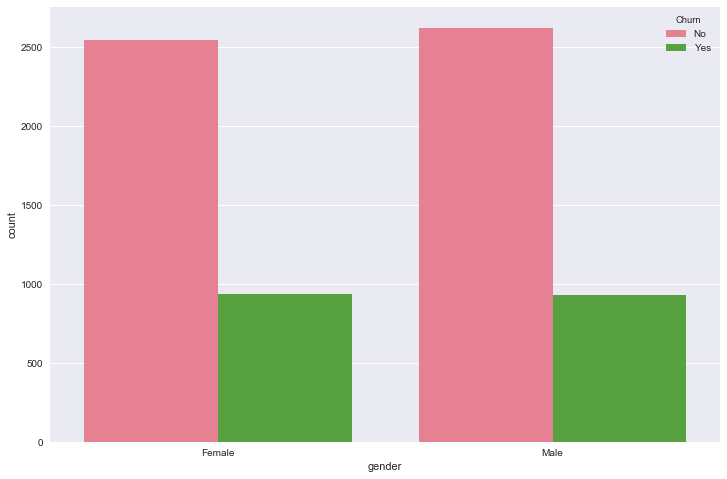

In [35]:
sns.set()
sns.set_palette('husl',3)
fig,ax= plt.subplots(figsize=(12,8))
ax = sns.countplot(x='gender',hue='Churn', data=churn_df)

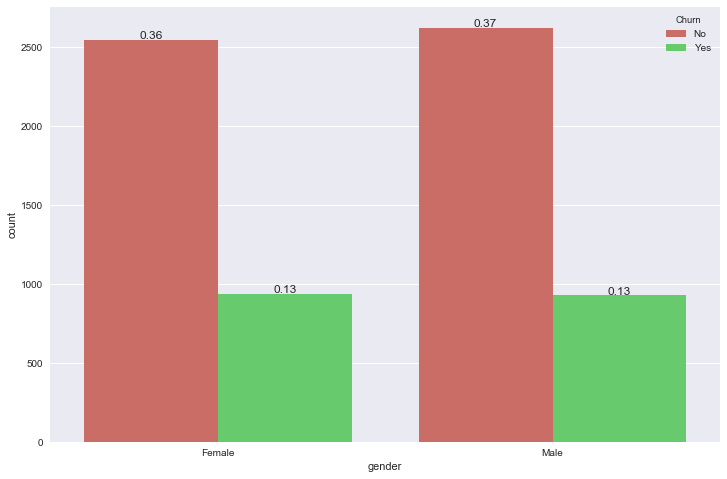

In [34]:
sns.set()
sns.set_palette('hls',3)
fig,ax= plt.subplots(figsize=(12,8))
ax = sns.countplot(x='gender',hue='Churn', data=churn_df)

for p in  ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height+3, '{:1.2f}'.format(height/churn_df.shape[0]), ha='center')

In [36]:
#We see that the Churn - 'Yes' or 'No' has no dependency on Gender (because values are almost same)

In [39]:
gender_churn_ct = pd.crosstab(index=churn_df['gender'],columns=churn_df['Churn'])

In [40]:
gender_churn_ct

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


In [44]:
print(gender_churn_ct.iloc[0].values)
print(gender_churn_ct.iloc[1].values)

[2549  939]
[2625  930]


In [53]:
from scipy import stats
(chi2, p_value, dof, _) = stats.chi2_contingency([gender_churn_ct.iloc[0].values,gender_churn_ct.iloc[1].values])

In [54]:
print(chi2)
print(p_value)
print(dof)
print(_)

0.4840828822091383
0.48657873605618596
1
[[2562.38989067  925.61010933]
 [2611.61010933  943.38989067]]


In [55]:
#chi-squared value is 0.48 - less hence, it is not statistically significant
#This is also proven by having p_value as 0.48 (>0.05). Hence, we fail to reject the Null hypothesis. Hence, there is no relationship and 'gender' column can be ignored

In [56]:
#chi2 = sum((Observed - Expected)**2/Expected)
#Here, Expected is the sum of each row in the crosstab

In [58]:
cont_table= pd.crosstab(index=churn_df['gender'],columns=churn_df['Churn'],margins=True)
cont_table

Churn,No,Yes,All
gender,,,
Female,2549,939,3488
Male,2625,930,3555
All,5174,1869,7043


In [65]:
chi = np.sqrt((((2549-3488)**2)+((939-3488)**2)+((2625-3555)**2)+((930-3555)**2))/7043)

chi

46.3561440527392

In [80]:
bill_ct = pd.crosstab(index=churn_df['PaperlessBilling'],columns=churn_df['Churn'])

In [81]:
bill_ct

Churn,No,Yes
PaperlessBilling,,
No,2403,469
Yes,2771,1400


In [76]:
churn_df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [77]:
#There seems to be a significantly higher records with PaperlessBilling as Yes

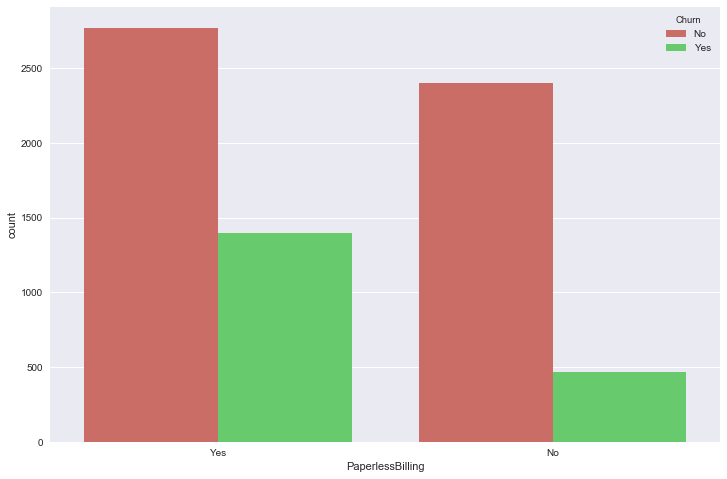

In [78]:
sns.set()
sns.set_palette('hls',3)
fig,ax= plt.subplots(figsize=(12,8))
ax = sns.countplot(x='PaperlessBilling',hue='Churn', data=churn_df)

In [85]:
bill_ct.iloc[0].values

array([2403,  469], dtype=int64)

In [88]:
chi_2,p_value, dof, _=stats.chi2_contingency([bill_ct.iloc[0].values,bill_ct.iloc[1].values])

In [89]:
print(chi_2)
print(p_value)
print(dof)
print(_)

258.27764906707307
4.073354668665985e-58
1
[[2109.85773108  762.14226892]
 [3064.14226892 1106.85773108]]


In [91]:
#Here, as p_value is less than 0.05, we can reject the Null hypothesis and hence
#we see that there is a statistically significant relationship between Churn and PaperlessBilling columns
#Higher value of chi_2 also supports this